In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette('husl')

In [70]:
df = pd.read_csv('data/processed.csv', index_col=0, dtype={'key': str, 'title': str, 'authors': str, 'abstract': str, 'year_published': int, 'tags': object})
df.tags = df.tags.str.strip("[]").str.replace(r"\s*|'", '').str.split(',')
df.head()

/var/folders/1y/6byzw1px62g2f5w7p_rhb6kh0000gn/T/ipykernel_23506/1523540997.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df.tags = df.tags.str.strip("[]").str.replace(r"\s*|'", '').str.split(',')


,key,title,authors,abstract,year_published,tags,category,skills,types
0,rayyan-354359269,An experience of automated assessment in a lar...,"Zampirolli F.A., Borovina Josko J.M., Venero M...",The 2020 pandemic imposed new demands on teach...,2021,"[data:none, language:python, technique:unit_te...",['dynamic'],['correctness'],"['description', 'evaluation', 'experience']"
1,rayyan-354359270,Semiautomatic generation and assessment of Jav...,"Insa D., Pérez S., Silva J., Tamarit S.",Continuous assessment is essential in educatio...,2021,"[feedback:rule_failure, technique:unit_testing...","['dynamic', 'static']","['correctness', 'maintainability']","['description', 'evaluation']"
2,rayyan-354359271,A tool for evaluating computer programs from s...,"Vaneck Q., Colart T., Frénay B., Vanderose B.",Computer science studies are more and more pop...,2021,"[data:none, feedback:gamified, evaluation:none...",['static'],"['readability', 'maintainability']",['description']
3,rayyan-354359272,Virtual Teaching Assistant for Grading Program...,"Chou C.-Y., Chen Y.-J.",This study proposes an automated programming a...,2021,"[evaluation:auto_grading, technique:unit_testi...","['dynamic', 'static']",['correctness'],"['description', 'evaluation']"
4,rayyan-354359273,Analysis of an automatic grading system within...,"Hegarty-Kelly E., Mooney D.A.",Reliable and pedagogically sound automated fee...,2021,"[evaluation:auto_grading, technique:unit_testi...","['dynamic', 'static']","['correctness', 'readability']","['description', 'evaluation']"


# Meta-Data
### Years Published

In [71]:
count_years = df.year_published.value_counts().reset_index().rename(columns={'index': 'year_published', 'year_published': 'no_published'})
count_years.head()

,year_published,no_published
0,2021,28
1,2020,28
2,2019,25
3,2018,21
4,2017,19


In [72]:
count_years.no_published.sum()

123

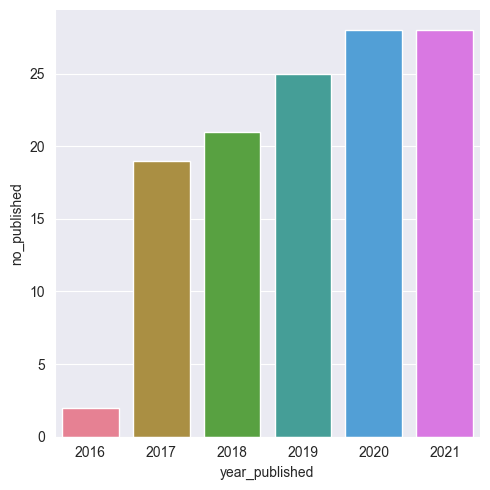

In [73]:
sns.catplot(count_years, kind='bar', x='year_published', y='no_published')
plt.savefig('plots/years_published.pdf')

## Paper Types

In [74]:
paper_types = pd.Series([paper_type for paper_type in df.types]).value_counts().reset_index()
paper_types.columns = ["paper_type", 'no_type']
paper_types.head()

,paper_type,no_type
0,"['description', 'evaluation']",80
1,['evaluation'],18
2,['description'],11
3,['experience'],11
4,"['description', 'evaluation', 'experience']",1


In [75]:
paper_types.no_type.sum()

123

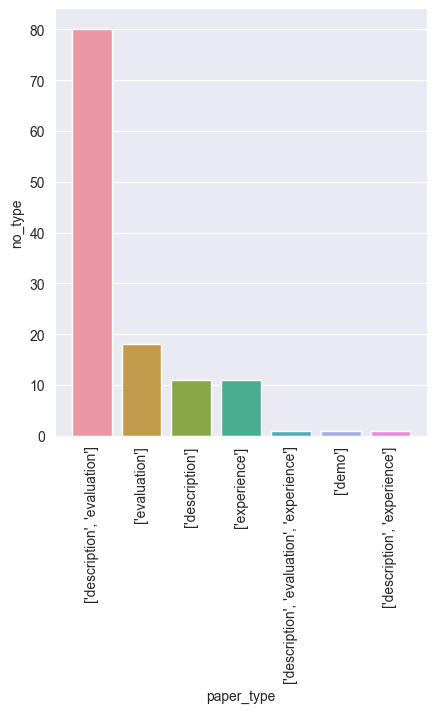

In [76]:
sns.catplot(paper_types, kind='bar', x='paper_type', y='no_type')
plt.xticks(rotation=90)
plt.autoscale()
plt.savefig('plots/paper_types.pdf', bbox_inches='tight')

## Degree of Automation

In [77]:
auto = pd.Series([tag.replace('approach:', '') for tags in df.tags for tag in tags if tag.startswith('approach')]).value_counts().reset_index()
auto.columns = ["degree_of_automation", 'number']
auto.head()

,degree_of_automation,number
0,fully_automated,100
1,semi_automatic,17
2,unclear,6


In [78]:
auto.number.sum()

123

In [79]:
pd.concat([df.title, df.tags.apply(lambda labels: [label for label in labels if 'approach' in label])], axis=1)

,title,tags
0,An experience of automated assessment in a lar...,[approach:fully_automated]
1,Semiautomatic generation and assessment of Jav...,[approach:semi_automatic]
2,A tool for evaluating computer programs from s...,[approach:fully_automated]
3,Virtual Teaching Assistant for Grading Program...,[approach:semi_automatic]
4,Analysis of an automatic grading system within...,[approach:fully_automated]
...,...,...
118,Learning and teaching numerical methods with a...,[approach:fully_automated]
119,Ask-Elle: an Adaptable Programming Tutor for H...,[approach:fully_automated]
120,An AI system for coaching novice programmers,[approach:fully_automated]
121,Automatic extraction of AST patterns for debug...,[approach:fully_automated]


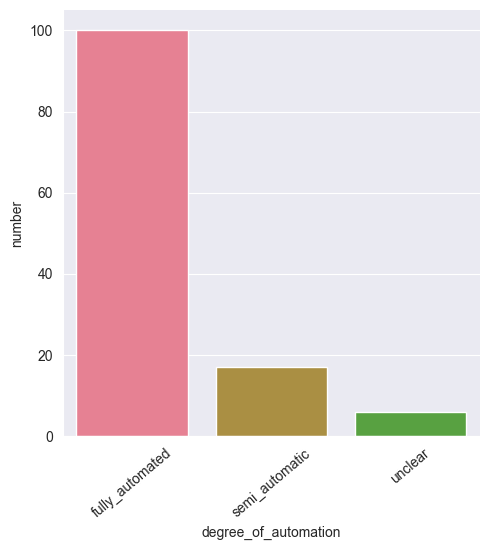

In [80]:
sns.catplot(auto, kind='bar', x='degree_of_automation', y='number')
plt.xticks(rotation=40)
plt.savefig('plots/auto_degree.pdf', bbox_inches='tight')

## Interaction type

In [81]:
inter = pd.Series([tag.replace('interaction:', '') for tags in df.tags for tag in tags if tag.startswith('interaction')]).value_counts().reset_index()
inter.columns = ["interaction", 'number']
inter.head()

,interaction,number
0,unknown,52
1,multiple,50
2,single,18
3,none,3


In [82]:
inter.number.sum()

123

In [83]:
pd.concat([df.title, df.tags.apply(lambda labels: [label for label in labels if 'interaction' in label])], axis=1)

,title,tags
0,An experience of automated assessment in a lar...,[interaction:unknown]
1,Semiautomatic generation and assessment of Jav...,[interaction:unknown]
2,A tool for evaluating computer programs from s...,[interaction:unknown]
3,Virtual Teaching Assistant for Grading Program...,[interaction:multiple]
4,Analysis of an automatic grading system within...,[interaction:unknown]
...,...,...
118,Learning and teaching numerical methods with a...,[interaction:multiple]
119,Ask-Elle: an Adaptable Programming Tutor for H...,[interaction:multiple]
120,An AI system for coaching novice programmers,[interaction:unknown]
121,Automatic extraction of AST patterns for debug...,[interaction:multiple]


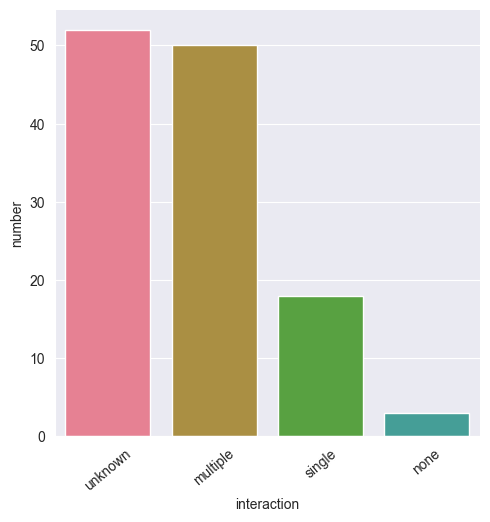

In [84]:
sns.catplot(inter, kind='bar', x='interaction', y='number')
plt.xticks(rotation=40)
plt.savefig('plots/interaction.pdf', bbox_inches='tight')

# Category

In [85]:
category = pd.Series([cat for cat in df.category]).value_counts().reset_index()
category.columns = ["category", 'number']
category

,category,number
0,['dynamic'],52
1,"['dynamic', 'static']",30
2,['static'],30
3,"['static', 'machine learning']",5
4,['machine learning'],2
5,"['dynamic', 'machine learning']",1
6,['misc'],1
7,"['dynamic', 'static', 'machine learning']",1


In [86]:
category.number.sum()

122

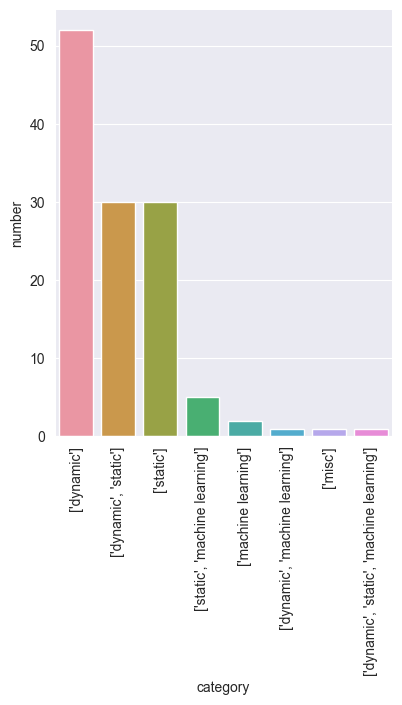

In [87]:
sns.catplot(category, kind='bar', x='category', y='number')
plt.xticks(rotation=90)
plt.savefig('plots/category.pdf', bbox_inches='tight')

## Skills

In [88]:
skills = pd.Series([skill for skill in df.skills]).value_counts().reset_index()
skills.columns = ["skills", 'number']
skills

,skills,number
0,['correctness'],75
1,"['correctness', 'readability']",21
2,"['correctness', 'maintainability']",8
3,['readability'],7
4,"['correctness', 'readability', 'maintainability']",7
5,"['readability', 'maintainability']",3
6,"['correctness', 'documentation']",1
7,['maintainability'],1


In [89]:
skills.number.sum()

123

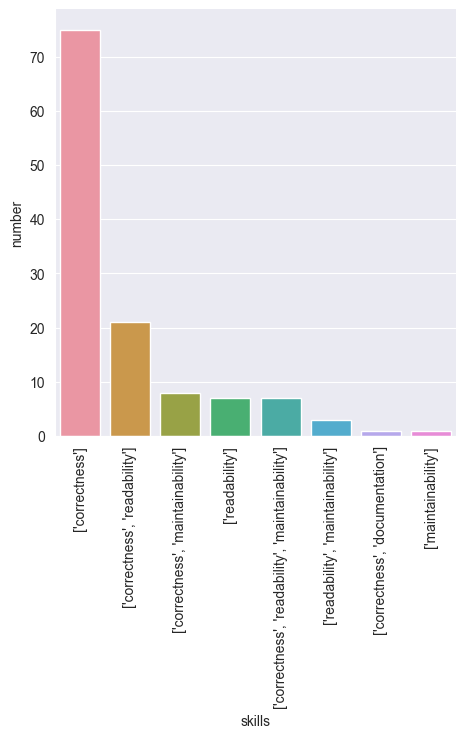

In [90]:
sns.catplot(skills, kind='bar', x='skills', y='number')
plt.xticks(rotation=90)
plt.savefig('plots/skills.pdf', bbox_inches='tight')